In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('school_stats.csv', delimiter= '\t')
df.head()

,Name,Math_Avg,Reading_Avg,Attendance_Ratio,Rating
0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,404,355,0.254,2
1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423,383,0.186,2
2,EAST SIDE COMMUNITY SCHOOL,402,377,0.097,4
3,FORSYTH SATELLITE ACADEMY,401,414,0.560,3
4,MARTA VALLE HIGH SCHOOL,433,390,0.252,3


In [3]:
df= df.drop('Attendance_Ratio', axis=1)

In [4]:
# Delete the rows with label "Ireland"
# For label-based deletion, set the index first on the dataframe:
# data = data.set_index("Area")
# data = data.drop("Ireland", axis=0). # Delete all rows with label "Ireland"
df= df.set_index('Rating')

In [5]:
df= df.drop(3, axis=0)

In [6]:
df= df.drop(0, axis=0)

In [7]:
df= df.drop(1, axis=0)

In [8]:
df.describe()

,Math_Avg,Reading_Avg
count,209.000000,209.000000
mean,390.866029,378.794258
std,129.458269,122.873531
min,0.000000,0.000000
25%,369.000000,363.000000
50%,394.000000,393.000000
75%,445.000000,423.000000
max,735.000000,679.000000


In [9]:
df.head()

,Name,Math_Avg,Reading_Avg
Rating,,,
2,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,404,355
2,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423,383
4,EAST SIDE COMMUNITY SCHOOL,402,377
4,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,557,332
4,CASCADES HIGH SCHOOL,418,417


In [10]:
df=df.reset_index()

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [12]:
X= df[['Math_Avg', 'Reading_Avg']]
y= df[['Rating']]

In [13]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=4)

In [14]:
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [15]:
def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    
    # Your code here 
    r2= r2_score(y_true, y_predict)
    mse= mean_squared_error(y_true, y_predict)
    
    return r2, mse

In [16]:
dtr= DecisionTreeRegressor(random_state=45)
dtr.fit(X_train, y_train)
y_pred= dtr.predict(X_test)
print('prediction: \n',y_pred)
score= performance(y_test, y_pred)
print('R2: {} and MSE: {}'.format(score[0], score[1]))

prediction: 
 [4.         2.         4.         2.44444444 4.         2.
 2.         2.44444444 4.         4.         2.         4.
 4.         2.         2.         4.         4.         4.
 2.         2.44444444 4.         4.         2.         4.
 4.         2.         2.         2.         2.         2.44444444
 4.         4.         2.         2.         2.         4.
 2.         2.         4.         2.         2.         4.
 2.44444444 4.         2.44444444 4.         4.         2.
 4.         2.         2.         4.         4.        ]
R2: -0.28433862433862456 and MSE: 1.2802236198462613


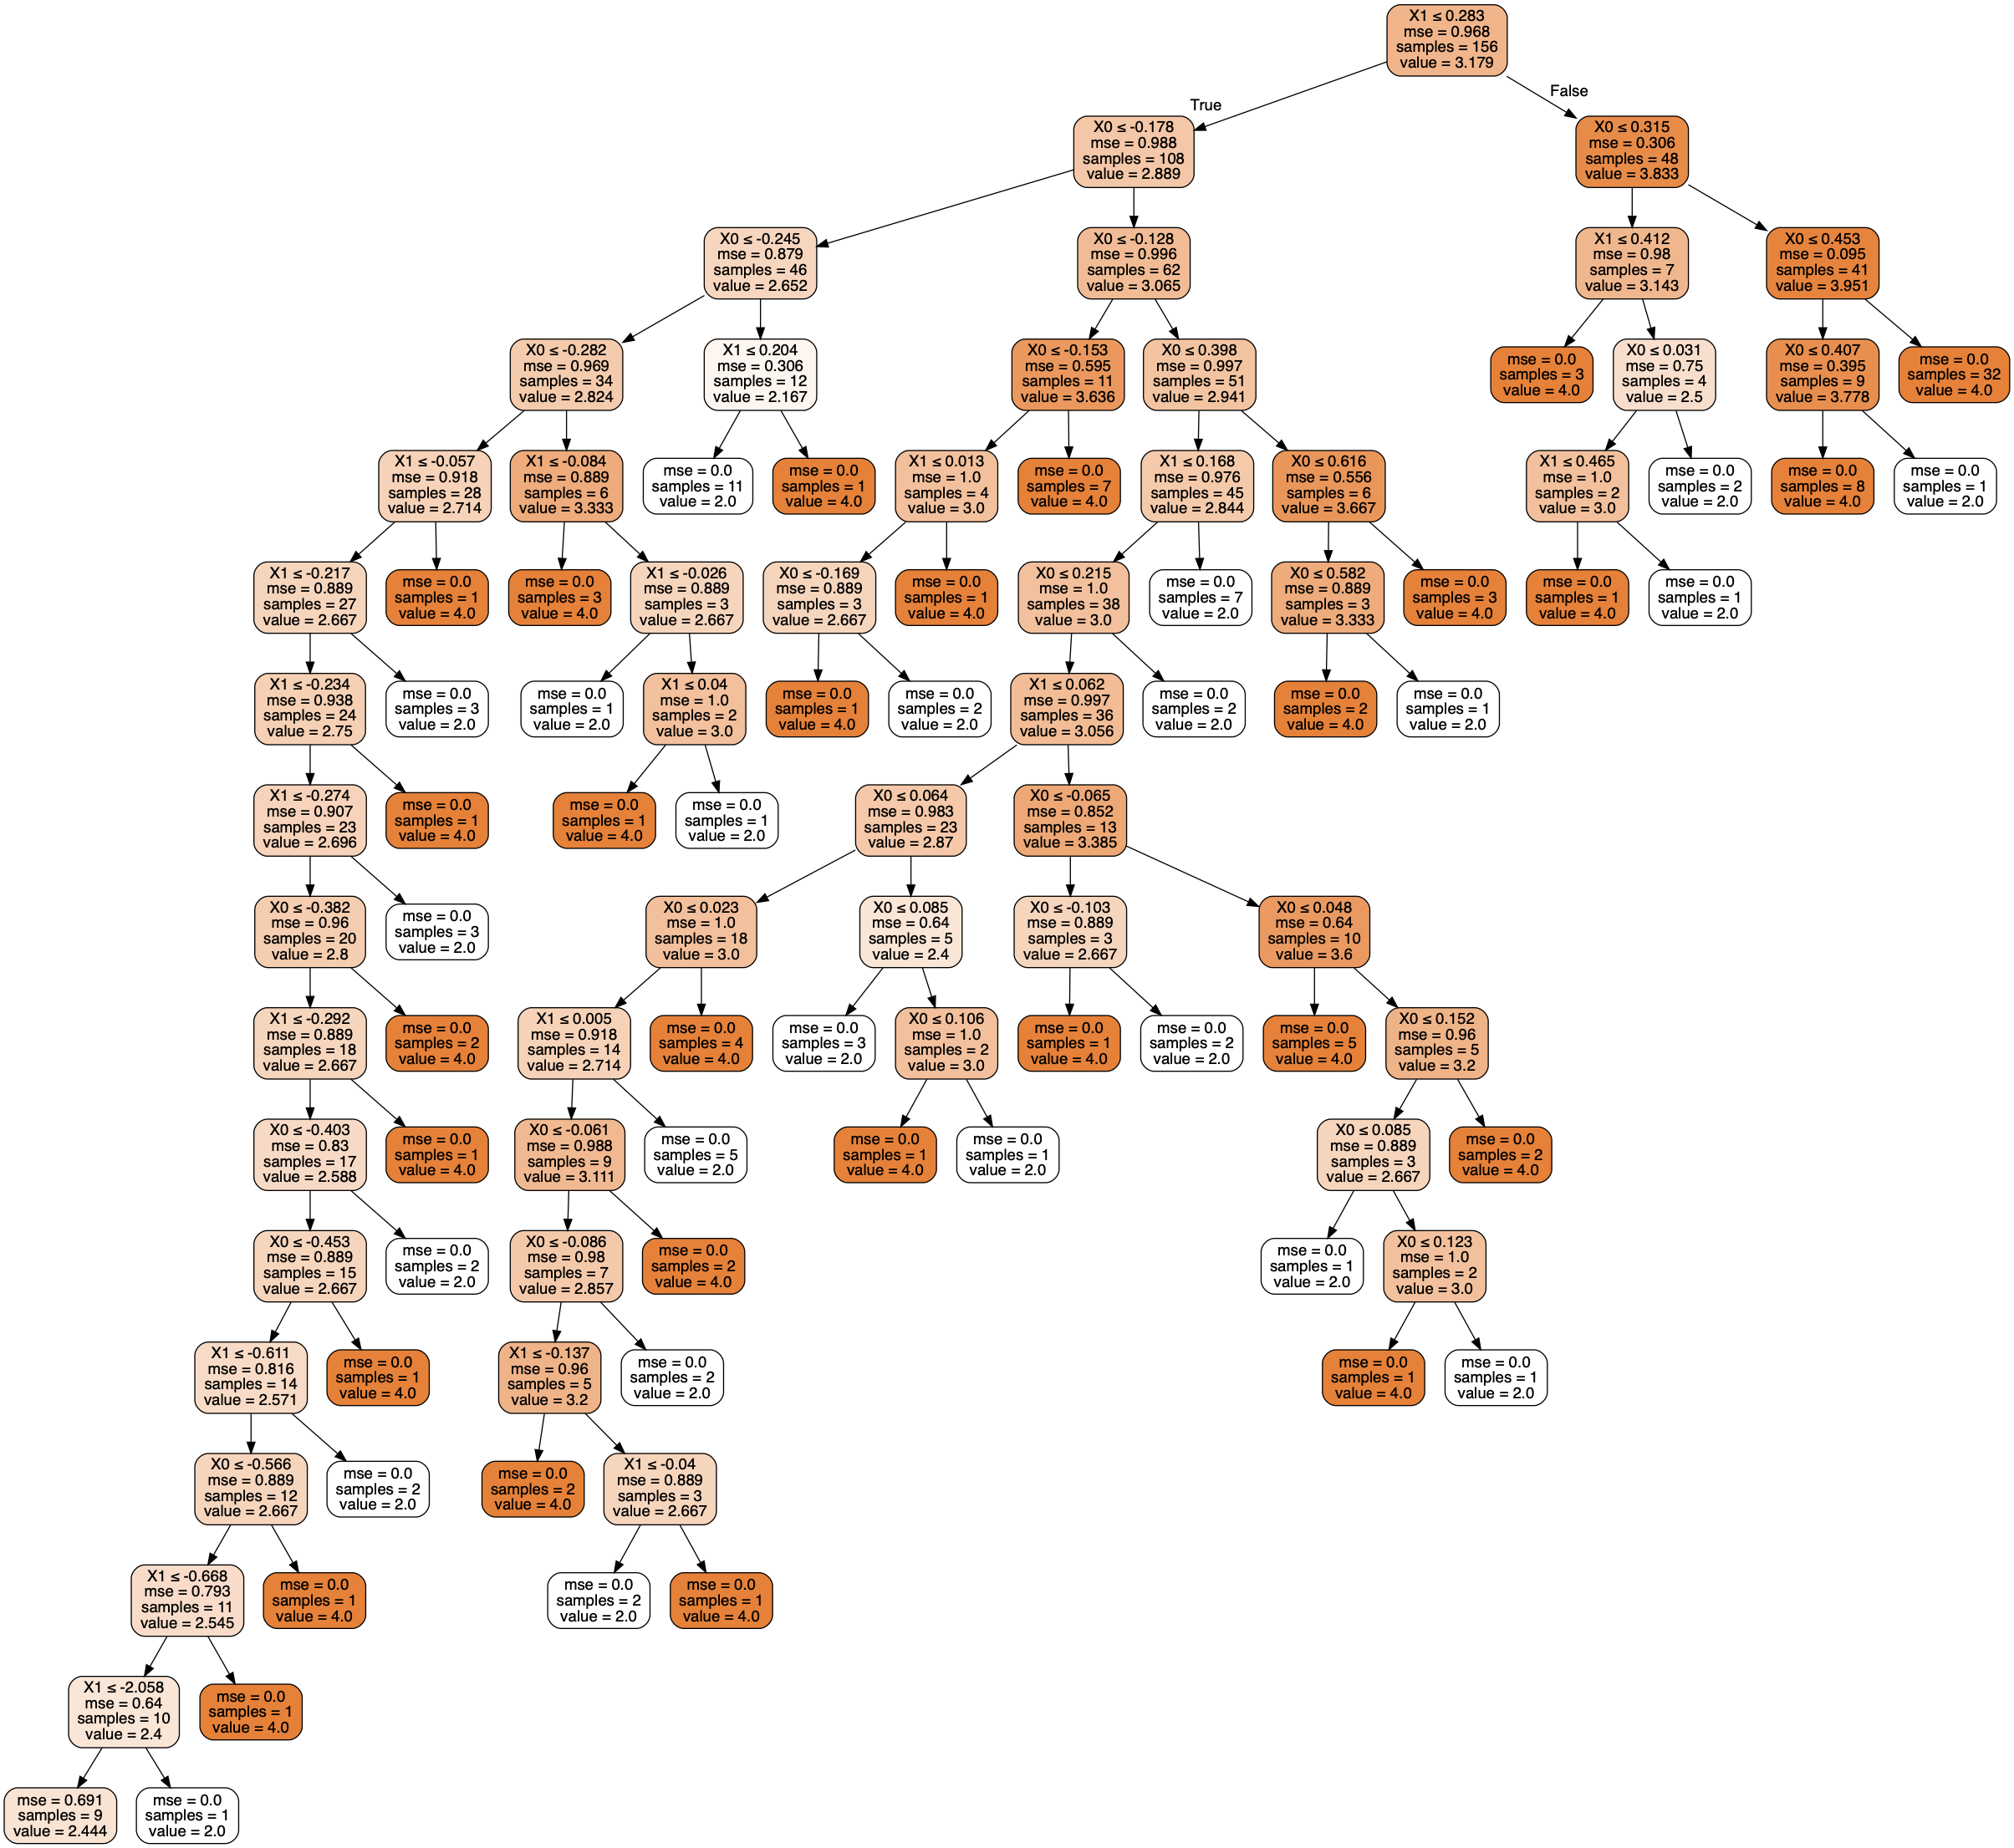

In [17]:
# Visualize the decision tree using graph viz library 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

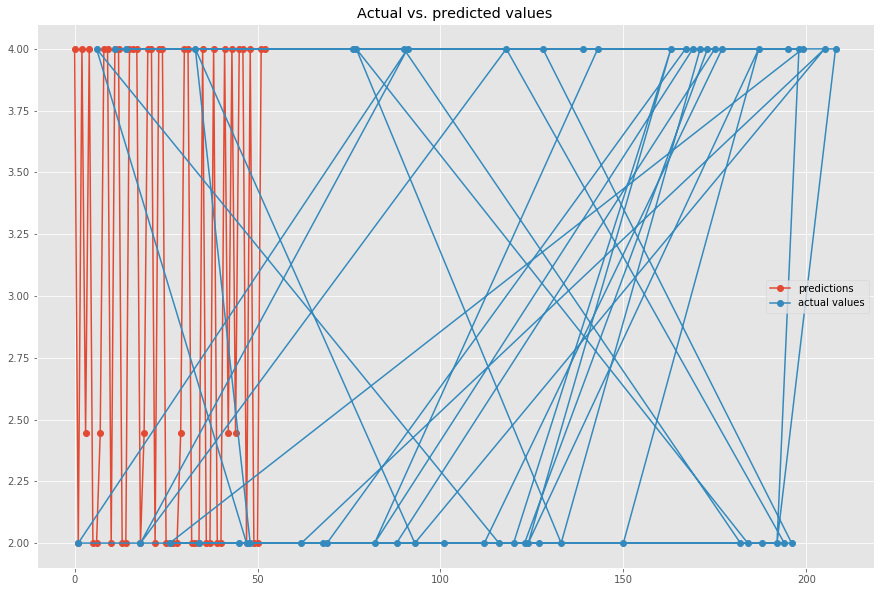

In [18]:
# Plot predicted and actual values as line plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.style.use('ggplot')

plt.plot(y_pred, linestyle='-', marker='o', label='predictions')
plt.plot(y_test, linestyle='-', marker='o', label='actual values')
plt.title('Actual vs. predicted values')
plt.legend()
plt.show()

# New Dataframe:

In [19]:
data= pd.read_csv('school_stats.csv', delimiter= '\t')
data= data.drop('Attendance_Ratio', axis=1) #dropping this column
data= data.set_index('Rating') #setting up a permiter to drop all rows containing rating of 0, 1 and 3
data= data.drop(3, axis=0)
data= data.drop(1, axis=0)
data= data.drop(0, axis=0)
data= data.reset_index()
data.head()

,Rating,Name,Math_Avg,Reading_Avg
0,2,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,404,355
1,2,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423,383
2,4,EAST SIDE COMMUNITY SCHOOL,402,377
3,4,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,557,332
4,4,CASCADES HIGH SCHOOL,418,417


In [20]:
# X= data[['Math_Avg', 'Reading_Avg']]
y= data.iloc[:, 0].values
X= data.iloc[:, [2, 3]].values


In [21]:
# X = X.fillna(value=0) #Fill null values
# for col in X.columns:
#     X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col])) #We subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature
# X.head()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
#Your code here
modellog= logreg.fit(X_train, y_train)
modellog

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [24]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)
print('y training: \n',y_hat_train)
print('y testing: \n',y_hat_test)

y training: 
 [4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 2
 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 4 4 4 2 4 4 2 4 4 4 4 4
 4 4 4 4 2 4 4 4 4 4 4 2 4 4 4 4 2 2 4 2 4 2 4 2 2 2 4 2 4 4 4 4 4 4 2 2 4
 4 4 4 4 4 4 4 2 4 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 2 4 4]
y testing: 
 [4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 2 2 4 4 4 2 4 4 4 4 4 4
 4 2 2 4 4 2 4 4 2 4 4 4 2 2 4 4]


In [25]:
y_pred= logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n', cm)

confusion matrix: 
 [[ 8 18]
 [ 3 24]]


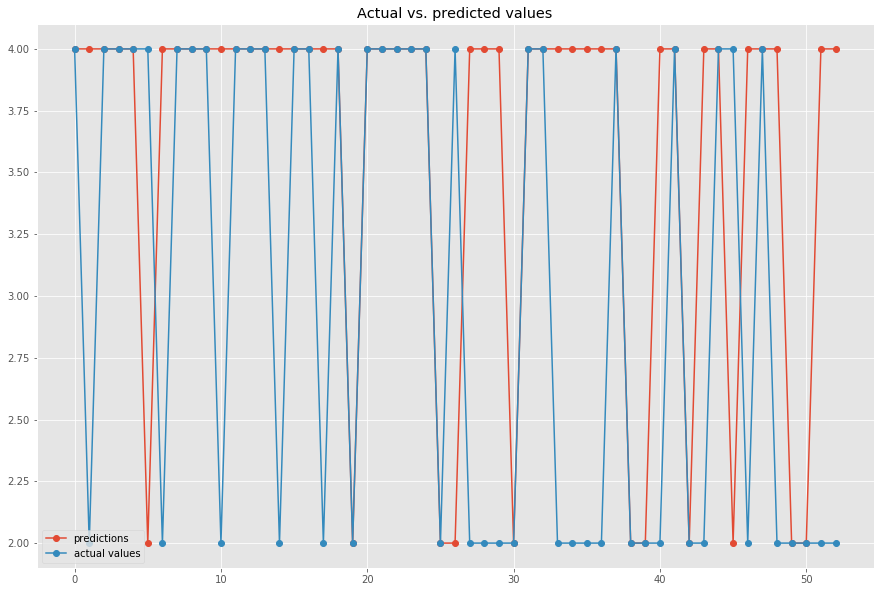

In [26]:
# Plot predicted and actual values as line plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.style.use('ggplot')

plt.plot(y_pred, linestyle='-', marker='o', label='predictions')
plt.plot(y_test, linestyle='-', marker='o', label='actual values')
plt.title('Actual vs. predicted values')
plt.legend()
plt.show()

In [27]:
#precision
def precision(y_hat, y):
    #Your code here
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    fp = sum([1 for i in y_y_hat if i[0]==0 and i[1]==1])
    return tp/float(tp+fp)

In [28]:
#recall
def recall(y_hat, y):
    #Your code here
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    fn = sum([1 for i in y_y_hat if i[0]==1 and i[1]==0])
    return tp/float(tp+fn)

In [29]:
#accuracy
def accuracy(y_hat, y):
    #Your code here
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    tn = sum([1 for i in y_y_hat if i[0]==1 and i[1]==0])
    return (tp+tn)/float(len(y_hat)) 

In [32]:
#Your code here
y_hat_test= logreg.predict(X_test)
y_hat_train= logreg.predict(X_train)

print('y_hat_test training accuracy :', accuracy(y_hat_train, y_train))
print('y_hat_test test accuracy :', accuracy(y_hat_test, y_train))

# print('y_hat_test training recall :', recall(y_hat_train, y_train))
# print('y_hat_test test recall :', recall(y_hat_test, y_train))

# print('y_hat_test training precision :', precision(y_hat_train, y_train))
# print('y_hat_test test precision :', precision(y_hat_test, y_train))

y_hat_test training accuracy : 0.0
y_hat_test test accuracy : 0.0


In [34]:
training_Accuracy = []
testing_Accuracy = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= None) #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)
#     training_Precision.append(precision(y_hat_train, y_train))
#     testing_Precision.append(precision(y_hat_test, y_test))
#     training_Recall.append(recall(y_hat_train, y_train))
#     testing_Recall.append(recall(y_hat_test, y_test))
    training_Accuracy.append(accuracy(y_hat_train, y_train))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))

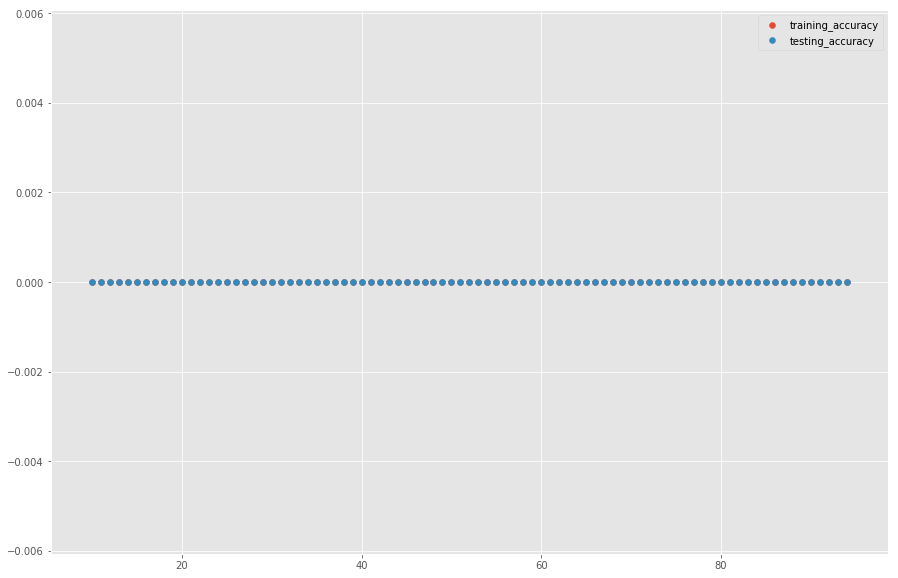

In [35]:
# code for test and train accuracy
plt.scatter(list(range(10,95)), training_Accuracy, label = 'training_accuracy')
plt.scatter(list(range(10,95)), testing_Accuracy, label = 'testing_accuracy')
plt.legend()

This was a bad model at predicting school rating, regardless of model type. Decision tree model was way worse at predicting than logistic but accuracy is still zero and according to confusion matrix, the model got nearly half wrong in predicting. needs a lot of fine tuning for this model to be viable.